### Part 1 – Problem Framing 

1.	What do you think is the real business problem here?
The real bussiness problem is declining win rate despite stable pipeline volumes.

2.	What key questions should an AI system answer for the CRO?
- Which industies, resions, products or lead sources have biggest drop
- Which sales rep is underperforming
- The avg time spent in the deal stages
- The deal amount correlation with win / loss
- Any seasonal trends effecting teh win rate

3.	What metrics matter most for diagnosing win rate issues?
- Wins by industry , region, rep and product
- Deals enering pipeline vs won
- Sales cycle length
- Sales Rep win rate and Volume of the sales

4.	What assumptions are you making about the data or business?
- Sales rep and unchanged over time.
- All sales rep. follow similiar sales process.


In [204]:
import pandas as pd
import numpy as np

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
pd.set_option("display.max_rows",None)

In [207]:
data=pd.read_csv("skygeni_sales_data.csv")
data.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


In [208]:
data.shape

(5000, 12)

In [209]:
data.isna().sum()

deal_id             0
created_date        0
closed_date         0
sales_rep_id        0
industry            0
region              0
product_type        0
lead_source         0
deal_stage          0
deal_amount         0
sales_cycle_days    0
outcome             0
dtype: int64

In [210]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   deal_id           5000 non-null   str  
 1   created_date      5000 non-null   str  
 2   closed_date       5000 non-null   str  
 3   sales_rep_id      5000 non-null   str  
 4   industry          5000 non-null   str  
 5   region            5000 non-null   str  
 6   product_type      5000 non-null   str  
 7   lead_source       5000 non-null   str  
 8   deal_stage        5000 non-null   str  
 9   deal_amount       5000 non-null   int64
 10  sales_cycle_days  5000 non-null   int64
 11  outcome           5000 non-null   str  
dtypes: int64(2), str(10)
memory usage: 468.9 KB


In [211]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [212]:
data.duplicated(subset=["deal_id"]).sum()

np.int64(0)

In [213]:
data.head(1)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won


In [214]:
#Convert date, time format
data["created_date"]=pd.to_datetime(data["created_date"])
data["closed_date"]=pd.to_datetime(data["closed_date"])

In [215]:
#Win(Flag)
data["win_flag"]=data["outcome"].map({"Won":1,"Lost":0})

In [216]:
# Month and quarter time features
data["created_month"]=data["created_date"].dt.to_period("M")
data["created_quarter"]=data["created_date"].dt.to_period("Q")

In [217]:
#Baseline metric-
overall_win_rate=data["win_flag"].mean()
overall_win_rate

np.float64(0.4526)

In [218]:
data.head(5)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,1,2023-01,2023Q1
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost,0,2023-10,2023Q4
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won,1,2023-07,2023Q3
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost,0,2024-02,2024Q1


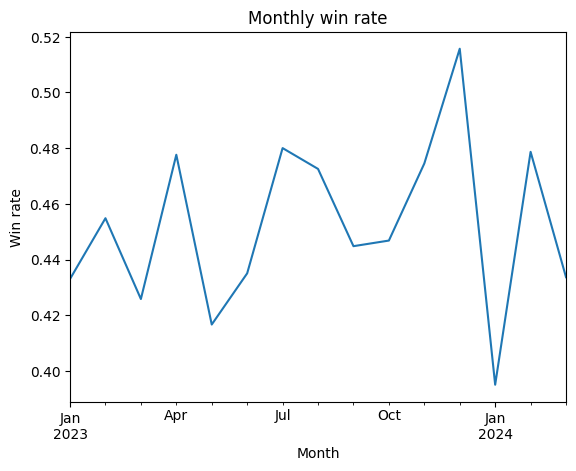

In [219]:
# Monthly win rate trend:
monthly_win_rate=data.groupby("created_month")["win_flag"].mean()
monthly_win_rate.plot()
plt.title("Monthly win rate")
plt.xlabel("Month")
plt.ylabel("Win rate")
plt.show()

#### We can observe there is a peak high in Dec 2023 and peak low in Jan 2024.The drop in win rate is recent and sudden, not a long-term decline — this suggests a change in process, market, or deal mix rather than a slow deterioration.

In [220]:
data.head(1)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4


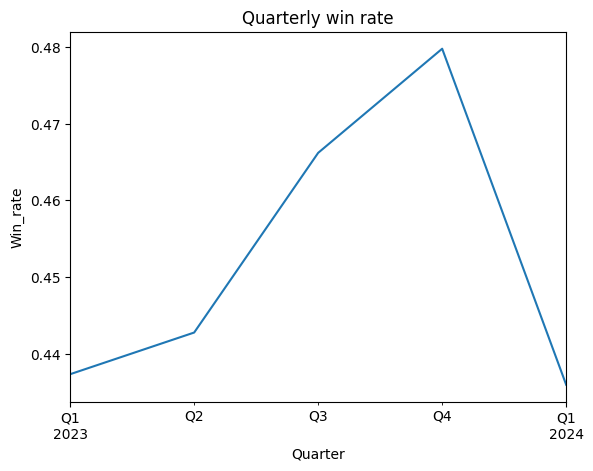

In [221]:
#Quaterly win rate
quarterly_win_rate=data.groupby("created_quarter")["win_flag"].mean()
quarterly_win_rate.plot()
plt.title("Quarterly win rate")
plt.xlabel("Quarter")
plt.ylabel("Win_rate")
plt.show()

#### We can observe there is a peak high in Q4 of 2023 and peak low in Q1 of 2024. from teh baseline metric we can infer that from 2023-Q2 till 2023-Q4 the win rate is high and it declined from there.

In [222]:
data.head(1)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4


In [223]:
data["sales_rep_id"].value_counts()

sales_rep_id
rep_20    230
rep_16    223
rep_2     221
rep_3     216
rep_22    212
rep_1     211
rep_21    208
rep_14    207
rep_25    205
rep_7     204
rep_24    203
rep_4     203
rep_5     201
rep_6     201
rep_11    200
rep_19    196
rep_13    195
rep_10    191
rep_8     187
rep_18    186
rep_9     186
rep_23    184
rep_12    180
rep_17    175
rep_15    175
Name: count, dtype: int64

Text(0.5, 0, 'Win rate')

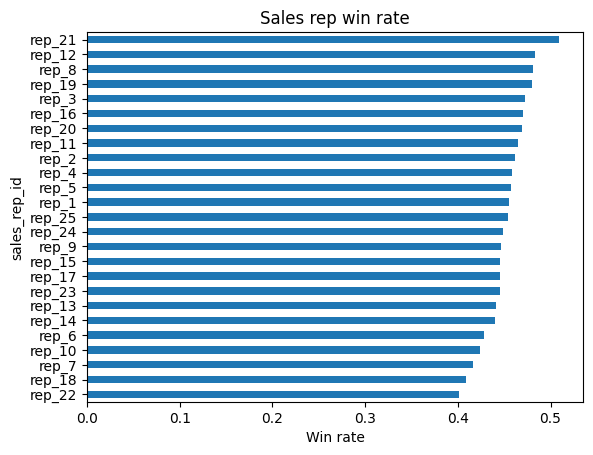

In [224]:
# Win rate by sales_rep
sales_rep_win_rate=data.groupby("sales_rep_id")["win_flag"].mean().sort_values()
sales_rep_win_rate.plot(kind="barh")
plt.title("Sales rep win rate")
plt.xlabel("Win rate")


#### Most reps are clustered around 0.44–0.48. The spread is small .The problem is systemic, not caused by a few bad sales reps

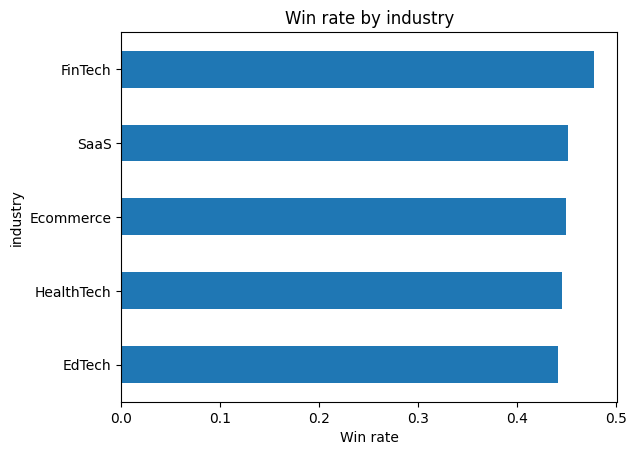

In [225]:
## Win rate by industry
win_rate_industry=data.groupby("industry")["win_flag"].mean().sort_values()
win_rate_industry.plot(kind="barh")
plt.title("Win rate by industry")
plt.xlabel("Win rate")
plt.show()

#### We can infer that FinTech performs best.industry is  not the primary reason of the recent drop.

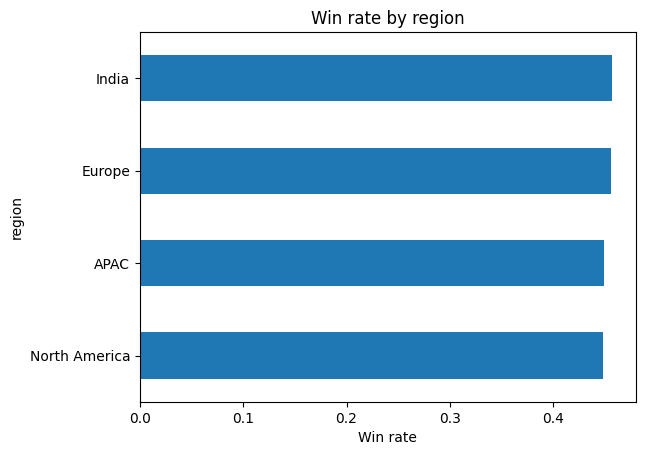

In [226]:
## Win rate by region
win_rate_region=data.groupby("region")["win_flag"].mean().sort_values()
win_rate_region.plot(kind="barh")
plt.title("Win rate by region")
plt.xlabel("Win rate")
plt.show()

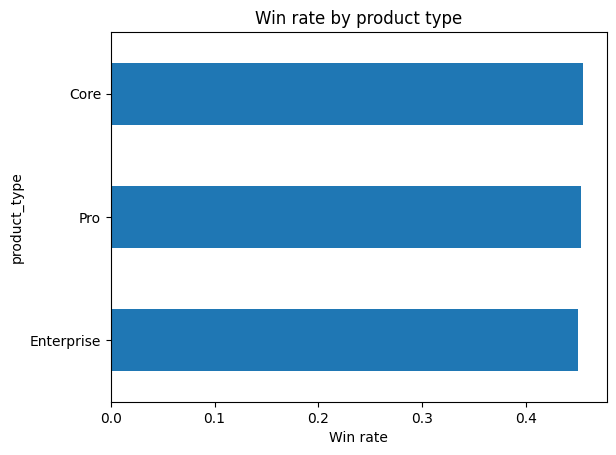

In [227]:
## Win rate by product type
win_rate_product=data.groupby("product_type")["win_flag"].mean().sort_values()
win_rate_product.plot(kind="barh")
plt.title("Win rate by product type")
plt.xlabel("Win rate")
plt.show()

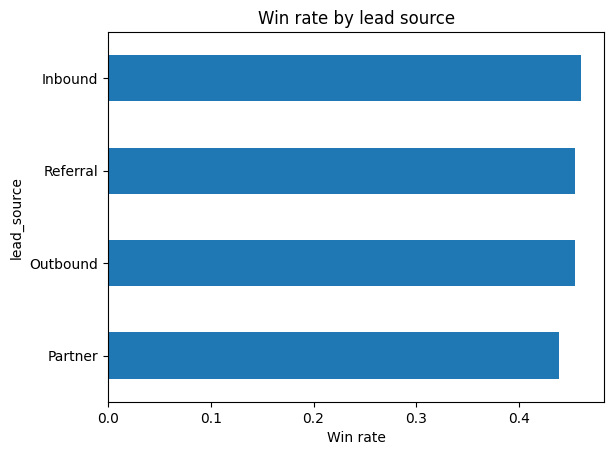

In [228]:
## Win rate by lead source
win_rate_lead_source=data.groupby("lead_source")["win_flag"].mean().sort_values()
win_rate_lead_source.plot(kind="barh")
plt.title("Win rate by lead source")
plt.xlabel("Win rate")
plt.show()

In [229]:
data.head(1)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4


#### From the above plots we can infer taht -The win-rate decline is time-driven and systemic, not rep-specific, and only mildly industry-driven — pointing toward changes in deal quality, sales cycle behavior, or pipeline composition.

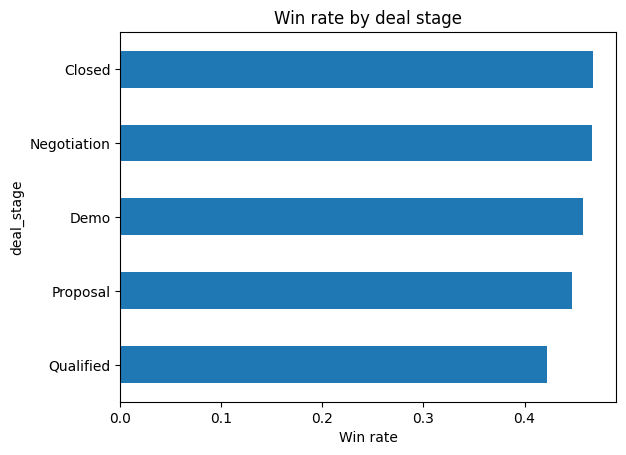

In [230]:
## Win rate by deal_stage
win_rate_industry=data.groupby("deal_stage")["win_flag"].mean().sort_values()
win_rate_industry.plot(kind="barh")
plt.title("Win rate by deal stage")
plt.xlabel("Win rate")
plt.show()

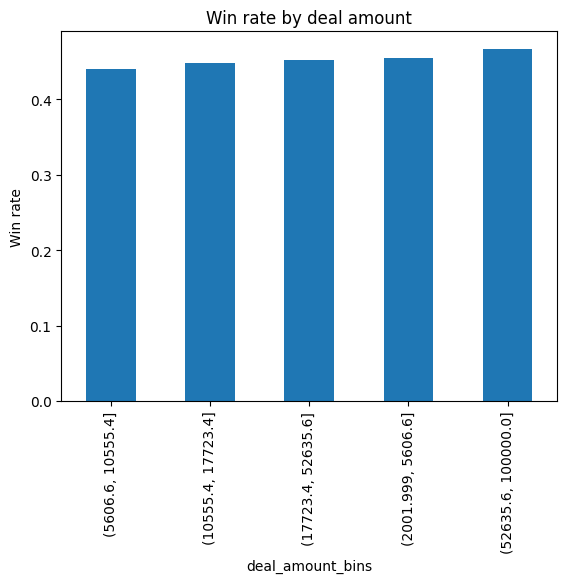

In [231]:
## Win rate by deal_amount
data["deal_amount_bins"]=pd.qcut(data["deal_amount"],q=5)
win_rate_deal_amount=data.groupby("deal_amount_bins")["win_flag"].mean().sort_values()
win_rate_deal_amount.plot(kind="bar")
plt.title("Win rate by deal amount")
plt.ylabel("Win rate")
plt.show()

#### We can observe that there is no steep change in the win rate based on the deal amount, however there is a gradual increase in th win rate with the deal size

In [232]:
data.head(2)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter,deal_amount_bins
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4,"(2001.999, 5606.6]"
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,1,2023-01,2023Q1,"(2001.999, 5606.6]"


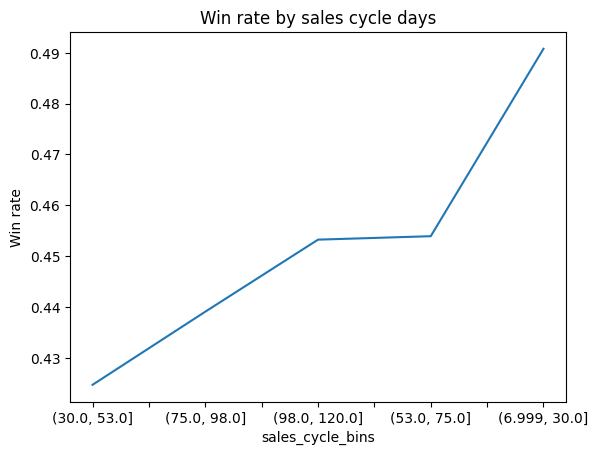

In [233]:
## Win rate by sales_cycle_days
data["sales_cycle_bins"]=pd.qcut(data["sales_cycle_days"],q=5)
win_rate_bycycle=data.groupby("sales_cycle_bins")["win_flag"].mean().sort_values()
win_rate_bycycle.plot(kind="line")
plt.title("Win rate by sales cycle days")
plt.ylabel("Win rate")
plt.show()

#### We can observe taht this is not an increasing trend
- Faster deals(7-30days) have higher win rate 
- Very long deals(98-120days) also have higher win rate
- mid cycle deals have lower win rate

In [234]:
data.head(2)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter,deal_amount_bins,sales_cycle_bins
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4,"(2001.999, 5606.6]","(6.999, 30.0]"
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,1,2023-01,2023Q1,"(2001.999, 5606.6]","(6.999, 30.0]"


#### Custom metrics:
1) Lead Quality ratio- Spots inefficient load_source
2) Stage stall score - Flags process bottle necks

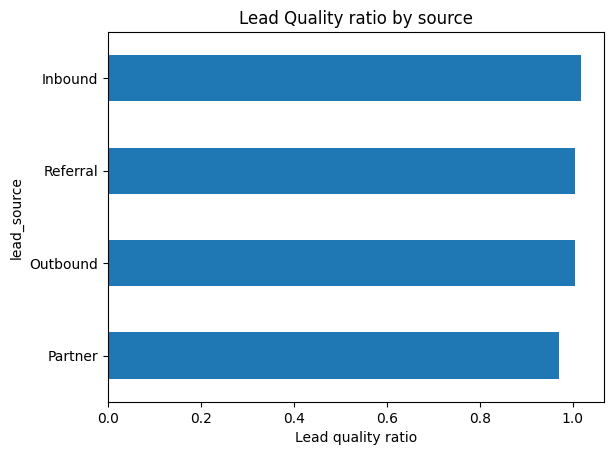

In [235]:
## Lead Quality ratio
lead_quality_win_rate=data.groupby("lead_source")["win_flag"].mean()
lead_quality_ratio=lead_quality_win_rate/overall_win_rate
lead_quality_ratio=lead_quality_ratio.sort_values()
data["lead_quality_ratio"]=data["lead_source"].map(lead_quality_ratio)
lead_quality_ratio.plot(kind="barh")
plt.title("Lead Quality ratio by source")
plt.xlabel("Lead quality ratio")
plt.show()

In [236]:
data.head(4)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter,deal_amount_bins,sales_cycle_bins,lead_quality_ratio
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4,"(2001.999, 5606.6]","(6.999, 30.0]",1.005903
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,1,2023-01,2023Q1,"(2001.999, 5606.6]","(6.999, 30.0]",1.005903
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost,0,2023-10,2023Q4,"(10555.4, 17723.4]","(30.0, 53.0]",1.017190
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won,1,2023-07,2023Q3,"(2001.999, 5606.6]","(6.999, 30.0]",0.971092


#### We can see that all the lead sources except for "Partner" are better than avg leads.(greater than 1)

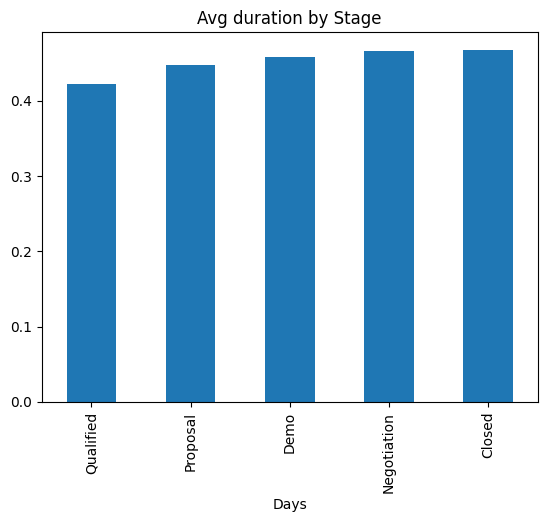

In [237]:
#Stage stalling
avg_duration=data.groupby("deal_stage")["win_flag"].mean().sort_values()
avg_duration.plot(kind="bar")
data["Stage_stalling"]=data["deal_stage"].map(avg_duration)
plt.title("Avg duration by Stage")
plt.xlabel("Days")
plt.show()


In [238]:
data.head(4)

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter,deal_amount_bins,sales_cycle_bins,lead_quality_ratio,Stage_stalling
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4,"(2001.999, 5606.6]","(6.999, 30.0]",1.005903,0.422594
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,1,2023-01,2023Q1,"(2001.999, 5606.6]","(6.999, 30.0]",1.005903,0.467402
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost,0,2023-10,2023Q4,"(10555.4, 17723.4]","(30.0, 53.0]",1.017190,0.446977
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won,1,2023-07,2023Q3,"(2001.999, 5606.6]","(6.999, 30.0]",0.971092,0.466332


## Insights
1) Monthly Win rate was dropped sharply in Jan 2024 and the months before that are quite stable.This strongly suggests that some recent change has caused this(like market conditions,behaviroual aspects like holiday and non holiday season and pricing)
- Action- run analysis on the changes made in thelast 1-2 months.

2) Large deals have better win rate
- Action- Prioritize them and provide additional support to protect this.

3) Fast deals and very long deals have higher win rates and mid duration deals have lowest win rates. Fast could mean urgent customer need.Long could mean, huge deals.
- Action- add alerts and check points when the deals stay in mid cycle for too long. 


******************************************************************

******************************************************************

In [246]:
# !pip install scikit-learn

#### Option B – Win Rate Driver Analysis
Identify which factors are hurting or improving win rate.

In [251]:
data.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,win_flag,created_month,created_quarter,deal_amount_bins,sales_cycle_bins,lead_quality_ratio,Stage_stalling
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-11,2023Q4,"(2001.999, 5606.6]","(6.999, 30.0]",1.005903,0.422594
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,1,2023-01,2023Q1,"(2001.999, 5606.6]","(6.999, 30.0]",1.005903,0.467402
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost,0,2023-10,2023Q4,"(10555.4, 17723.4]","(30.0, 53.0]",1.017190,0.446977
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won,1,2023-07,2023Q3,"(2001.999, 5606.6]","(6.999, 30.0]",0.971092,0.466332
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost,0,2024-02,2024Q1,"(17723.4, 52635.6]","(75.0, 98.0]",1.005427,0.422594


In [252]:
# slect features
y=data["win_flag"]

In [253]:
features=['industry',
       'region',  'lead_source', 'deal_stage' , 'deal_amount',
       'sales_cycle_days']
X=data[features]

In [254]:
# Encoding
X=pd.get_dummies(X,columns=["industry","region","lead_source","deal_stage"],drop_first=True)

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [256]:
# Extracting features resonsible for win rate
# creating a table
features_df=pd.DataFrame({"feature": X.columns,
                          "coefficient":lr_model.coef_[0]}).sort_values(by="coefficient",ascending=False)


In [257]:
features_df

,feature,coefficient
3,industry_FinTech,0.090062
4,industry_HealthTech,0.045307
13,deal_stage_Negotiation,0.034174
0,deal_amount,0.000001
1,sales_cycle_days,-0.001094
6,region_Europe,-0.010124
7,region_India,-0.013781
9,lead_source_Outbound,-0.017993
5,industry_SaaS,-0.028267
8,region_North America,-0.035084


In [258]:
features_df["impact"] = features_df["coefficient"].apply(
    lambda x: "Improves win rate" if x > 0 else "Hurts win rate"
)

In [259]:
# Top features whcih contribute to high win rate
features_df

,feature,coefficient,impact
3,industry_FinTech,0.090062,Improves win rate
4,industry_HealthTech,0.045307,Improves win rate
13,deal_stage_Negotiation,0.034174,Improves win rate
0,deal_amount,0.000001,Improves win rate
1,sales_cycle_days,-0.001094,Hurts win rate
6,region_Europe,-0.010124,Hurts win rate
7,region_India,-0.013781,Hurts win rate
9,lead_source_Outbound,-0.017993,Hurts win rate
5,industry_SaaS,-0.028267,Hurts win rate
8,region_North America,-0.035084,Hurts win rate


In [261]:
#Which deals are at high risk and has to be prioritized
#From the plots can understand that sales_cycle_days betwwen 30, 98 have lower win rate
data["high_risk_deal"] = (
    (data["sales_cycle_days"].between(30, 98)) &
    (data["Stage_stalling"] > 0.4) &
    (data["lead_quality_ratio"] < 1)
)


In [262]:
data.groupby("high_risk_deal")["win_flag"].mean()


high_risk_deal
False    0.456921
True     0.428191
Name: win_flag, dtype: float64

### From the above analysis we can point out the features which drive win rate.
- Industry- Fintech and healthtech have high win rate.
- Deal Stage- Deal stage at Negotiation have high win rate
- Deal amount- High deal amount also has high win rate.
- Deal cycle and Stalling- Mid cycle satges with high stall score has low win rate, we flagged them so taht sales leader can intervene.



************************************************************************************************************

************************************************************************************************************

### Part 4 – Mini System Design
Design a lightweight Sales Insight & Alert System.
Include:

**- High-level architecture:**

Data Sourcing and Ingestion

Data processing(EDA+ Models)

EDA metrics, aggregates

Insights

Alerts and Dashboards(Power BI)


**- Data flow:**

Data pull

Cleaning data ,feature engineering  and compute metrics

Analyze- apply the model and flag high risk deals

Insight generation-Alert if the threshold reached the limit

Push the alrets to sales leaders.


**- Example alerts or insights:**

Sales rep ID-"a" has X% higher win rate, can assign more pipeline deals.

Lead source-outbound leads now convert X% worse than last quater which suggests lead source qulaity drop.

**-How often it runs:**

Daily- Deal risk scoring

Weekly- Alerts and insights


**-Failure cases and limitations:**

Failures- Inconsistent data, imbalanced sample sizes

Limitations- needs review as sales process evolves.



### Part 5 – Reflection 

1.	What assumptions in your solution are weakest?
- That the win rate patterns remain stable over time. Sales patterns and market conditions evolve, where the insights drawn from past data might not be useful. .
2.	What would break in real-world production?
- If thresholds are not flagges properly , users may ignore alerts altogther.
3.	What would you build next if given 1 month?
- Intergrate a LLM powered natural language Q&A pipeline, which can answer questions in natural language
4.	What part of your solution are you least confident about?
- The decision engine(Logistic regression) missing out on non-linear patterns.

